In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import re
from pathlib import Path

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
basepath = Path("../../01_Scraping/data")

In [17]:
# Load dataset
df = pd.read_csv(basepath / Path("imdb_top_250.csv"), sep = ';')

# Data Cleaning

In [18]:
df.isnull().values.any()

False

# Data Preparation

In [19]:
df.columns

Index(['Rank', 'Title', 'Release Year', 'Duration', 'Age Rating', 'Rating',
       'Amount of Reviews'],
      dtype='object')

In [20]:
df.head()

,Rank,Title,Release Year,Duration,Age Rating,Rating,Amount of Reviews
0,1,Frihetens regn,1994,2h 22m,15,9.3,2.9M
1,2,Gudfaren,1972,2h 55m,15,9.2,2M
2,3,The Dark Knight,2008,2h 32m,15,9.0,2.9M
3,4,Gudfaren - del II,1974,3h 22m,15,9.0,1.4M
4,5,12 edsvorne menn,1957,1h 36m,16,9.0,860000


In [21]:
df.dtypes

Rank                  int64
Title                object
Release Year          int64
Duration             object
Age Rating           object
Rating               object
Amount of Reviews    object
dtype: object

except for "Rand" and "Release Year" all are non-numeric variables.
"Age Rating", "Title" and "Ranking" are not interesting for analyse rating. so they can be dropped from the column.
"Duration", "Rating" and "Amount of Reviews" are needed to be transferred into numeric variables

In [22]:
# x_org = df.drop(['Rank', 'Title', 'Age Rating', 'Rating'], axis=1)
# x_mapped = x_org
# y_org = df['Rating']
# y_mapped = y_org

df_mapped = df
# Mapping duration
def duration_to_minutes(duration):
   parts = duration.split(' ')
   hours = 0
   minutes = 0
   for part in parts:
      if 'h' in part:
         hours = int(part[:-1])
      elif 'm' in part:
         minutes = int(part[:-1])
#    print(hours, "\n")
#    print(minutes)
#    print(hours, minutes)
   total_minutes = hours * 60 + minutes
#    print(total_minutes)
   return total_minutes

df_mapped['Duration'] = df['Duration'].apply(duration_to_minutes)

df_mapped.dtypes

Rank                  int64
Title                object
Release Year          int64
Duration              int64
Age Rating           object
Rating               object
Amount of Reviews    object
dtype: object

In [23]:
# Map Amount of Reviews
def Review_num_map(review):
   if review[-1] == 'M':
      review = float(review[:-1]) * 1e6
      # print(review)
      return review
   elif review[-1] == 'B':
      review = float(review[:-1]) * 1e9
      # print(review)
      return review
   elif review[-1] == 'K':
      review = float(review[:-1]) * 1e3
      # print(review)
      return review
   else:
      # print(review)
      try:
         return float(review)
      except ValueError:
         return float('nan')  # Some amount of reviews are "Rate" or other strings
      

df_mapped['Amount of Reviews'] = df['Amount of Reviews'].apply(Review_num_map)

df_mapped.dtypes

Rank                   int64
Title                 object
Release Year           int64
Duration               int64
Age Rating            object
Rating                object
Amount of Reviews    float64
dtype: object

In [24]:
# Map Ratings
def rating_mapping(rating):
    try:
        return float(rating)
    except ValueError:
        return float('nan')
df_mapped['Rating'] =  df['Rating'].apply(rating_mapping)
df_mapped.dtypes

Rank                   int64
Title                 object
Release Year           int64
Duration               int64
Age Rating            object
Rating               float64
Amount of Reviews    float64
dtype: object

In [25]:
# Clean data and initial feature selection
df_mapped.isnull().values.any()
# The result shows there are missing values in the current dataset 

True

In [26]:
# Drop the missing data -> 
# can be better to give the missing rating value an approximate rating according to the rating above and below it
df_mapped=df_mapped.dropna(axis=0, how='any')
df_mapped.isnull().values.any()

False

# Correlation

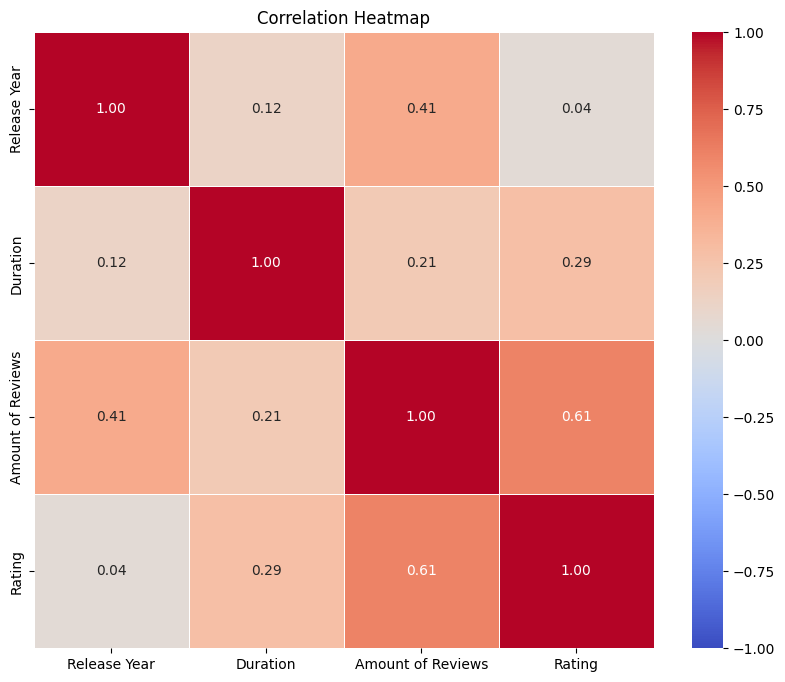

In [27]:
x_mapped = df_mapped.drop(['Rank', 'Title', 'Age Rating', 'Rating'], axis=1)
y_mapped = df_mapped['Rating']

correlation_matrix = pd.concat([x_mapped, y_mapped], axis=1).corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,vmin=-1, vmax=1, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()